
# Parameter estimation using grid search with cross-validation

This examples shows how a classifier is optimized by cross-validation,
which is done using the :class:`~sklearn.model_selection.GridSearchCV` object
on a development set that comprises only half of the available labeled data.

The performance of the selected hyper-parameters and trained model is
then measured on a dedicated evaluation set that was not used during
the model selection step.

More details on tools available for model selection can be found in the
sections on `cross_validation` and `grid_search`.


# Import libraries

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

import numpy as np
import time

# Load Dataset

In [18]:
# Loading the Digits dataset
digits = datasets.load_digits()

In [19]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [20]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [21]:
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

In [22]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [23]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

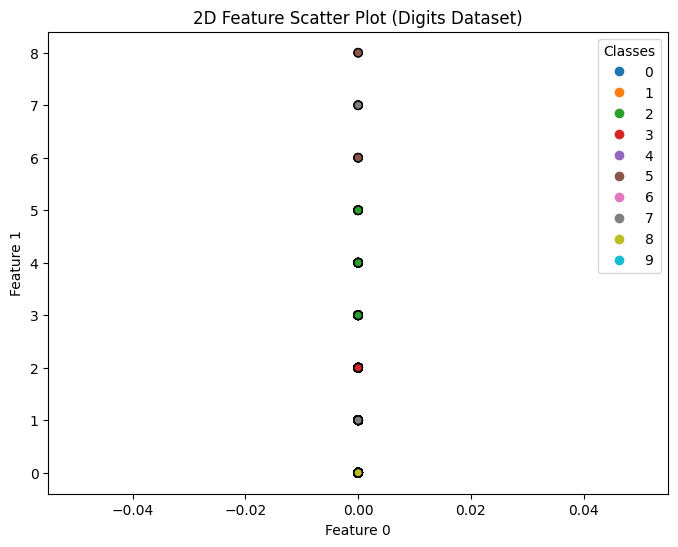

In [24]:
import matplotlib.pyplot as plt
from sklearn import datasets

# Load digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Select only two features for 2D plotting (e.g., feature 0 and feature 1)
feature1 = X[:, 0]
feature2 = X[:, 1]

plt.figure(figsize=(8,6))
scatter = plt.scatter(feature1, feature2, c=y, cmap='tab10', edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('2D Feature Scatter Plot (Digits Dataset)')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# Split the dataset into Train and Test

In [4]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Set the parameters for hyperpartmeters optimsation

In [ ]:
#Set the number of parameters to Test
x = np.linspace(0.01, 1000.0, num=100)

#why?

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [
                        #{"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
                        {"kernel": ["linear"], "C": x },#[0.01, 0.1, 1, 10, 100, 1000]},
                    ]

#to understand...

#  Begin the grid search

In [7]:
#start time 
start_time = time.time()

In [8]:
scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': np.float64(0.01), 'kernel': 'linear'}

Grid scores on development set:

0.976 (+/-0.015) for {'C': np.float64(0.01), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(10.110909090909091), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(20.211818181818185), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(30.312727272727276), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(40.413636363636364), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(50.514545454545456), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(60.61545454545455), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(70.71636363636365), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(80.81727272727274), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(90.91818181818182), 'kernel': 'linear'}
0.974 (+/-0.012) for {'C': np.float64(101.01909090909092), 'ke

In [9]:
end_time = time.time()
duration = end_time-start_time
print ('It took',"%.2f" % duration,' seconds ')

It took 26.28  seconds 
